## Geomagnetic storm magnitude 

Makes txt and png files for Dst and Nc (Newell coupling)

Issues:

- indicate whether Dst comes from NOAA or OMNI
- make Nc plot and add Nc to output file already with the data_update_web_hf program, but test here




In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import urllib
import pandas as pd
import os
import sys
from numba import njit
import importlib
import copy


import plotly.graph_objects as go
import numpy as np
from plotly.offline import iplot, init_notebook_mode


#import 
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging


outputdir='results/icme_rate/'

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    from config_server import data_path
    matplotlib.use('Agg') 
   
        
#mac
if sys.platform =='darwin':  
    print('system is mac')
    from config_local import data_path    
    #matplotlib.use('Agg') 
    %matplotlib inline     

print(data_path)


os.system('jupyter nbconvert --to script geomagnetic_storms.ipynb')    




/Users/chris/python/miniconda3/envs/helio4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



system is mac
/Users/chris/python/data/insitu_python/


[NbConvertApp] Converting notebook geomagnetic_storms.ipynb to script
[NbConvertApp] Writing 9841 bytes to geomagnetic_storms.py


0

### get Dst data

In [2]:
##get omni dst data
get_new_data=0

fileomni="omni_1963_now.p"
if get_new_data: hd.save_omni_data(data_path,fileomni)
[o,ho]=pickle.load(open(data_path+fileomni, "rb" ) )  

print(data_path+fileomni)

start=datetime.datetime.utcnow() - datetime.timedelta(days=2*365)
end=datetime.datetime.utcnow() 
#hp.plot_insitu_update(o, start, end,'OMNI2',outputdir,now=True)


#get current dst last 35 days
filenoaa='noaa_dst_last_35files_now.p'
n=pickle.load(open(data_path+filenoaa, "rb" ) )  

#store the original dst values
norig=copy.deepcopy(n)


#get current dst last 300 days
#filenoaa='noaa_dst_last_300files_now.p'
#n2=pickle.load(open(data_path+filenoaa, "rb" ) )  

############### TO DO stitch together n and n2


#take only last year in the omni data
os=o.dst[-24*365:]
ot=o.time[-24*365:]

#search for the latest data point of omni in noaa dst, and cutoff the noaa dst
cutoff=np.where(np.isfinite(os)==False)[0][0]
print(ot[cutoff])
cutoffnoaa=np.where(n.time > ot[cutoff])[0][0]
print(cutoffnoaa)
#cut noaa dst array
n=n[cutoffnoaa:]

print(norig.time)


/Users/chris/python/data/insitu_python/omni_1963_now.p
2023-09-18 13:00:00
1169
[datetime.datetime(2023, 7, 30, 21, 0)
 datetime.datetime(2023, 7, 30, 22, 0)
 datetime.datetime(2023, 7, 30, 23, 0) ...
 datetime.datetime(2023, 9, 21, 7, 0) datetime.datetime(2023, 9, 21, 8, 0)
 datetime.datetime(2023, 9, 21, 9, 0)]


### plot Dst

77.0 -422.0


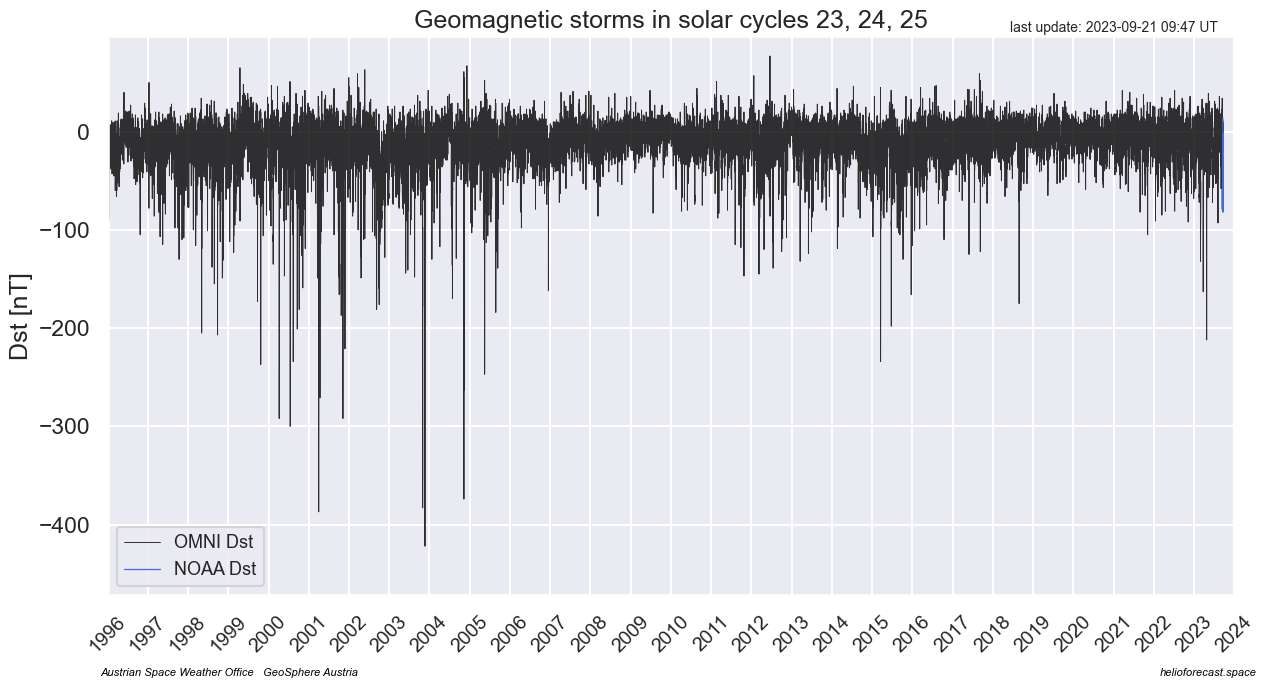

In [3]:
years=np.arange(1995,2040) 
yearly_start_times=[datetime.datetime(year,1,1) for year in years]

sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')
#stack both OMNI and NOAA Dst and determine min max for last 25 years
plotmin=np.nanmin(np.hstack([o.dst,n.dst])[-365*24*25:-1] )
plotmax=np.nanmax(np.hstack([o.dst,n.dst])[-365*24*25:-1] )
print(plotmax, plotmin)
ax1.set_ylim(plotmin-50,plotmax+20)

ax1.set_xlim(start,end)

plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(yearly_start_times, fontsize=14,rotation=45) 

ax1.set_xlim(datetime.datetime(1996,1,1),datetime.datetime(2024,1,1))

#ax1.set_xlim(datetime.datetime(2023,1,1),datetime.datetime(2024,1,1))

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Geomagnetic storms in solar cycles 23, 24, 25',fontsize=18)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=fsize-4, style='italic')

plt.figtext(0.95,0.93,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UT', ha='right', fontsize=10)
plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_all.png',dpi=100)



39.0 -212.0
saved as results/icme_rate/geomagnetic_storm_latest.png


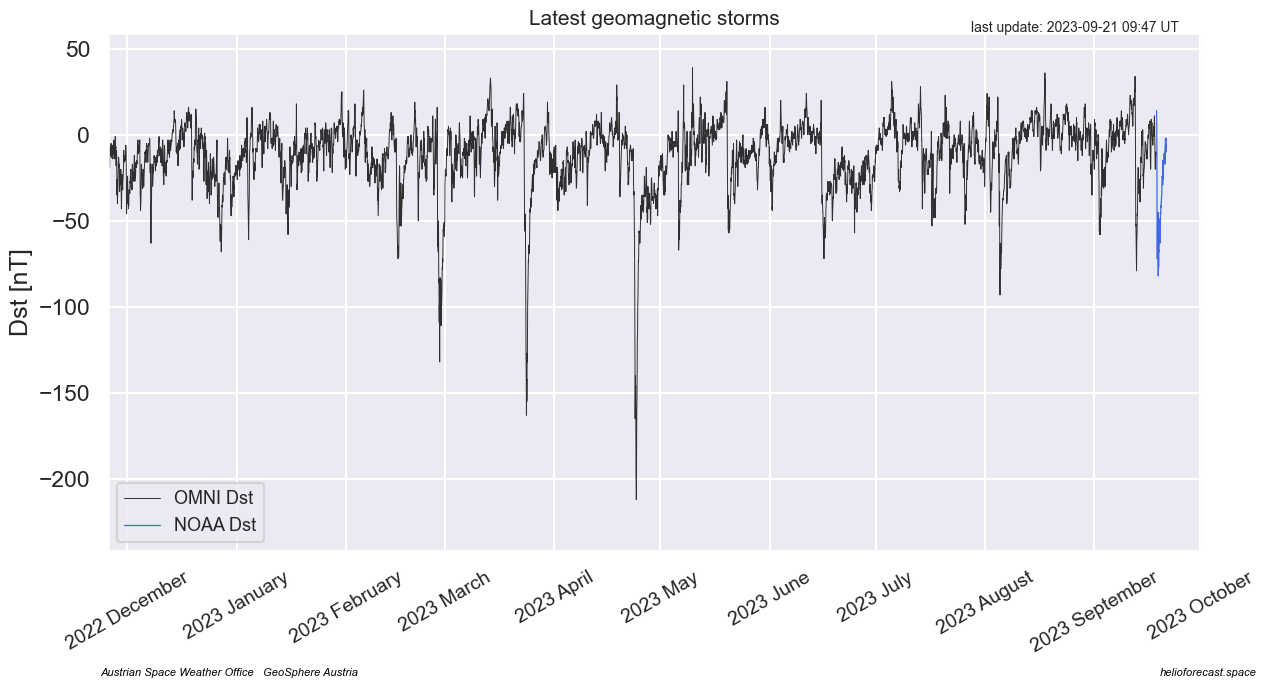

In [4]:
years=np.arange(1995,2040) 
months=np.arange(1,13)
monthly_start_times=[datetime.datetime(year,month,1) for year in years for month in months]


sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)


ax1.plot(o.time,o.dst,color='k',linewidth=0.7,alpha=0.8, label='OMNI Dst')
ax1.plot(n.time,n.dst,color='royalblue',linewidth=0.9,alpha=1.0,label='NOAA Dst')

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')


#stack both OMNI and NOAA Dst and determine min max for last year
plotmin=np.nanmin(np.hstack([o.dst,n.dst])[-365*24:-1])
plotmax=np.nanmax(np.hstack([o.dst,n.dst])[-365*24:-1])
print(plotmax, plotmin)

ax1.set_xlim(start,end)
ax1.set_ylim(plotmin-30,plotmax+20)
plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(monthly_start_times, fontsize=14,rotation=30) 


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=300),datetime.datetime.utcnow()+datetime.timedelta(days=10))

#ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=10),datetime.datetime.utcnow()+datetime.timedelta(days=10))


#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Latest geomagnetic storms',fontsize=15)

fsize=12
plt.legend(loc=3,fontsize=13)
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space', color='black', ha='right',fontsize=fsize-4, style='italic')
plt.figtext(0.92,0.93,'last update: '+str(datetime.datetime.utcnow())[0:16]+ ' UT', ha='right', fontsize=10)
plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_latest.png',dpi=100)


print('saved as', outputdir+'geomagnetic_storm_latest.png')
##histogram

## Newell Coupling

 
TBD calculate Newell coupling without propagation first
 
[0.  0.  0.  ... 0.5 0.7 0.5]
done


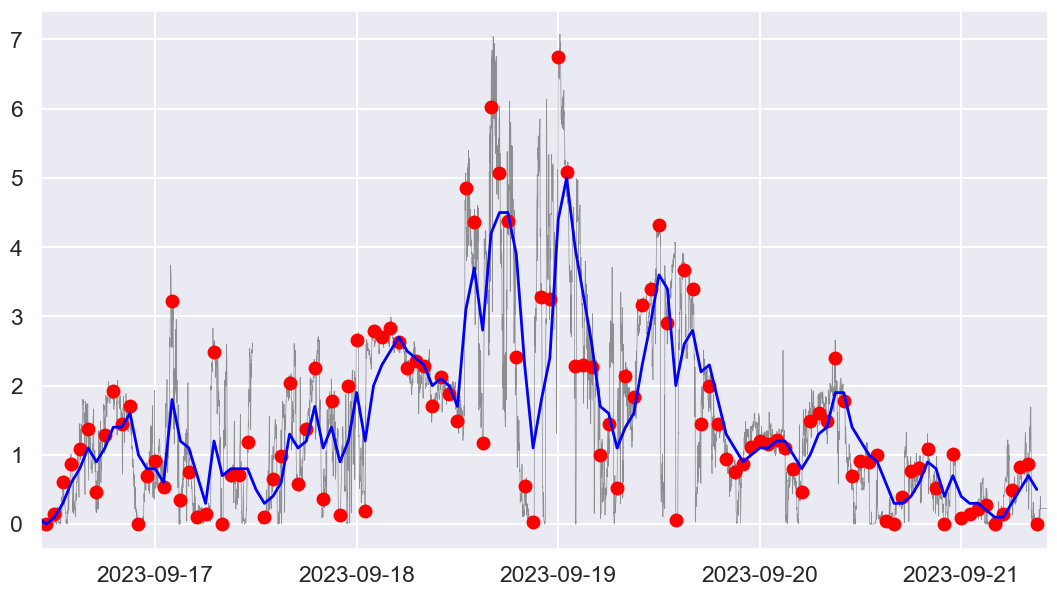

In [94]:
###add plot and add to txt file without propagation 

#get NOAA solar wind

filenoaa='noaa_rtsw_last_35files_now.p'
[w,h]=pickle.load(open(data_path+filenoaa, "rb" ) )  

    
@njit
def calc_coupling_newell(by, bz, v):
    #Empirical Formula for dFlux/dt - the Newell coupling
    #e.g. paragraph 25 in Newell et al. 2010 doi:10.1029/2009JA014805
    #input: needs arrays for by, bz, v    
    
    bt = np.sqrt(by**2 + bz**2)
    bztemp = bz
    bztemp[bz == 0] = 0.001
    tc = np.arctan2(by,bztemp)     #calculate clock angle (theta_c = t_c)
    neg_tc = bt*np.cos(tc)*bz < 0  #similar to IDL code sol_coup.pro
    tc[neg_tc] = tc[neg_tc] + np.pi
    sintc = np.abs(np.sin(tc/2.))
    nc = (v**1.33333)*(sintc**2.66667)*(bt**0.66667)
    
    return nc


def nc_weights(nc):    

    #this function is for 1 hour time resolution
    nc_weight=np.zeros(len(nc))

    prev_hour_weight = 0.65    # reduce weighting by factor with each hour back
    
    weights=np.zeros(4)

    weights[3] = 1  #the current fraction of hour is weighted as linear
    weights[2] = prev_hour_weight  
    weights[1] = prev_hour_weight**2  
    weights[0] = prev_hour_weight**3      
    
    for i in np.arange(4,len(nc)):
        #add and normalize
        nc_weight[i] = np.round(np.nansum(nc[i-3:i+1]*weights)/ np.nansum(weights),1)    
    
    return nc_weight

print(' ')
print('TBD calculate Newell coupling without propagation first')
print(' ')
#n-> dst
#w-> solar wind



#minute resolution
w_nc=calc_coupling_newell(w.by,w.bz,w.vt)/4421
#interpolate to 1 hour first
n_nci=np.interp(mdates.date2num(norig.time),mdates.date2num(w.time),w_nc)
#then do weighting
n_ncw=nc_weights(n_nci)

print(n_ncw)

#check if this process is how its done for ovation



sns.set_context('talk')
sns.set_style('darkgrid')

fig, ax1=plt.subplots(1,figsize=(13,7),dpi=100)

ax1.plot(w.time,w_nc,'-k',linewidth=0.5,alpha=0.4)
ax1.plot(norig.time,n_nci,'or',linewidth=0.5)
ax1.plot(norig.time,n_ncw,'-b',linewidth=2)


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=5),datetime.datetime.utcnow())

print('done')



In [95]:
#save data for last few months as txt


## to do: indicate if data comes from OMNI or NOAA

dst=np.hstack([os[cutoff-24*180:cutoff],n.dst])
time=np.hstack([ot[cutoff-24*180:cutoff],n.time])
output_format='%Y-%m-%dT%H:%MZ'
time=[ts.strftime(output_format) for ts in time]

data=np.zeros(len(time),dtype=[('time','U17'),('dst', float)])   

#add Nc

#convert to recarray
data = data.view(np.recarray)  
data.time=time
data.dst=dst

#data.nc=nc


#save latest year as file
np.savetxt(outputdir+'geomagnetic_storm_latest.txt',data, delimiter=' ', fmt='%s %d', header='time [UT]   Dst [nT] / data from OMNI2, NOAA. ASWO, GeoSphere Austria  created '+str(datetime.datetime.utcnow())[0:16])
print('saved as', outputdir+'geomagnetic_storm_latest.txt')

print(' ')
print('latest data point',data.time[-1])

saved as results/icme_rate/geomagnetic_storm_latest.txt
 
latest data point 2023-09-21T09:00Z


In [7]:
print(' ')
print(' ')
print('Dst update png and txt done ')

print('------------------------')

 
 
Dst update png and txt done 
------------------------


#### looking into the data

In [8]:
#https://plotly.com/python/


data_lookup=0


if data_lookup > 0:

    #init_notebook_mode(connected = True)
    init_notebook_mode(connected = False)

    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=o.time, y=o.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()

In [9]:
if data_lookup > 0:
    
    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=n.time, y=n.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()


In [10]:
if data_lookup > 0:
    
    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=data.time, y=data.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()
